In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
print("Train Data (First 10 rows):")
print(train_data.head(10))

print("\nTest Data (First 10 rows):")
print(test_data.head(10))

Train Data (First 10 rows):
    x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984
5  36  32.463875
6  12  10.780897
7  81  80.763399
8  25  24.612151
9   5   6.963319

Test Data (First 10 rows):
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864
5  15   9.805235
6  62  58.874659
7  95  97.617937
8  20  18.395127
9   5   8.746748


In [ ]:
train_np = train_data.to_numpy()
test_np = test_data.to_numpy()

print("\nShape of Train Data:", train_np.shape)
print("Shape of Test Data:", test_np.shape)


Shape of Train Data: (699, 2)
Shape of Test Data: (300, 2)


In [ ]:
theta0_arr = np.arange(-0.5,1.6,0.2)
theta1_arr = np.arange(-0.5,1.6,0.2)

X = train_np[:,0]
Y = train_np[:,1]

def hypothesis(X,theta0,theta1):
  return (X * theta1) + theta0

def calculateCost(X,Y,theta0,theta1):
  Y1 = hypothesis(X, theta0, theta1)
  sum = np.sum(np.square(Y1 - Y))
  cost = (1 / (2 * len(X))) * sum
  return cost

min_cost = calculateCost(X,Y,-0.5,-0.5)
optimal_theta0, optimal_theta1 = -0.5, -0.5

for theta0 in theta0_arr:
  for theta1 in theta1_arr:
    cost = calculateCost(X,Y,theta0,theta1)
    if cost < min_cost:
      min_cost = cost
      optimal_theta0, optimal_theta1 = theta0, theta1

print(f"Minimum cost is: {min_cost}")
print(f"Optimal theta0 is: {optimal_theta0}")
print(f"Optimal theta1 is: {optimal_theta1}")

Minimum cost is: 14.046985412889548
Optimal theta0 is: 1.5
Optimal theta1 is: 0.9000000000000001


In [ ]:
X_test = test_np[:, 0]
Y_test = test_np[:, 1]

pred_Y = hypothesis(X_test, optimal_theta0, optimal_theta1)
print("\nPredicted Outputs for Test Data:")
print(pred_Y)


Predicted Outputs for Test Data:
[70.8 20.4 21.3 19.5 33.9 15.  57.3 87.  19.5  6.   5.1 18.6 87.9 57.3
 33.9 15.  60.  14.1 79.8 63.6 81.6 47.4 81.6 25.8 88.8 53.7 72.6 20.4
 85.2 25.8 90.6 29.4 31.2 73.5 26.7 43.8 49.2 63.6 26.7 31.2 83.4 65.4
 46.5 69.9  5.1 34.8 64.5 62.7 37.5 33.  86.1 80.7 48.3 29.4 54.6  1.5
 36.6 59.1 63.6 52.8 13.2 66.3 69.9 56.4 75.3 17.7 38.4 46.5 51.  13.2
 42.9 13.2 72.6 49.2 15.  26.7 74.4 63.6 48.3 77.1 62.7 25.8 51.9 44.7
 37.5 36.6 75.3 91.5 54.6 40.2 61.8 35.7 58.2 83.4 55.5 14.1 20.4 79.8
 67.2 30.3  3.3 75.3 18.6 68.1 39.3 12.3  2.4 82.5 81.6  1.5 38.4 15.9
 86.1 88.8 60.9 23.1 16.8 82.5 13.2  1.5 59.1 87.9 89.7 12.3 38.4 43.8
 71.7 19.5 81.6 27.6 59.1 69.  12.3 24.  26.7 28.5 60.  54.6 59.1 49.2
 65.4 88.8 67.2  9.6 12.3 58.2 90.6 55.5 33.   3.3 55.5 30.3 86.1 77.1
 58.2 21.3 74.4 85.2 31.2  7.8 39.3 42.9 50.1 15.9 45.6 40.2 87.  60.9
 20.4 33.  73.5 34.8 50.1 51.9  2.4 30.3 53.7 30.3 42.9 66.3 16.8 88.8
 85.2 83.4 34.8  5.1 50.1 47.4 25.8 42.9 84

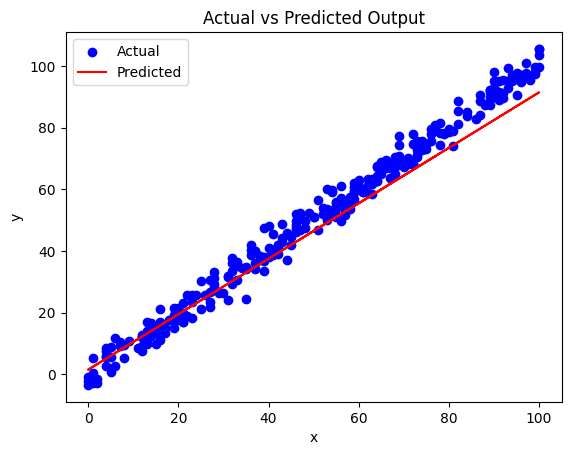

In [ ]:
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, pred_Y, color='red', label='Predicted')
plt.title('Actual vs Predicted Output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [76]:
def optimalThetas(X,Y,alpha):
  theta0, theta1 = np.random.randn(), np.random.randn()
  m = len(Y)
  newCost, prevCost = calculateCost(X,Y,theta0,theta1),0
  while 1:
    prevCost = newCost
    Y1 = hypothesis(X,theta0,theta1)
    gradient0 = (1 / m) * np.sum(Y1 - Y)
    gradient1 = (1 / m) * np.sum((Y1 - Y) * X)
    theta0 = theta0 - (alpha*gradient0)
    theta1 = theta1 - (alpha*gradient1)
    newCost = calculateCost(X,Y,theta0,theta1)
    print(f"Cost: {newCost}, Theta0: {theta0}, Theta1: {theta1}")
    if(abs(prevCost-newCost) < 1e-6):        # Termination condition
      break;
  return theta0 ,theta1

x = np.array([5,10,15])
y = np.array([15,25,35])
alpha = 0.00001
optimalTheta0, optimalTheta1 = optimalThetas(X_test,Y_test,alpha)
print(f"Optimal Theta 0: {optimalTheta0}, Optimal Theta 1: {optimalTheta1}")


Cost: 552.0706486201483, Theta0: -0.7009543676899253, Theta1: 0.450781727577406
Cost: 515.4208895360808, Theta0: -0.7006649208212359, Theta1: 0.4700887645612555
Cost: 481.2245524908191, Theta0: -0.7003853112080869, Theta1: 0.488738378858366
Cost: 449.31739957787005, Theta0: -0.7001152038829032, Theta1: 0.5067529563172591
Cost: 419.5461873668243, Theta0: -0.6998542752840644, Theta1: 0.5241541205276781
Cost: 391.7679309069786, Theta0: -0.6996022128675216, Theta1: 0.5409627587762018
Cost: 365.8492170003045, Theta0: -0.6993587147316388, Theta1: 0.5571990471180466
Cost: 341.6655634455595, Theta0: -0.699123489254809, Theta1: 0.5728824745951496
Cost: 319.10082117612035, Theta0: -0.6988962547454101, Theta1: 0.5880318666296044
Cost: 298.0466164201326, Theta0: -0.6986767391036788, Theta1: 0.602665407620528
Cost: 278.4018302037855, Theta0: -0.6984646794950999, Theta1: 0.6168006627714846
Cost: 260.07211269787666, Theta0: -0.6982598220349159, Theta1: 0.6304545991746646
Cost: 242.96943007517186, The